# Poisson's Equation

* $\nabla ^2 \phi = -\rho$

- Index: 3502422
- Reference: 20916691

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, log



In [114]:
def phi(x,y):
    return x**2 * np.sin(2*pi*y) + y**2 * np.cos(2*pi*x)

def rho(x,y):
    return 2*(np.sin(2*pi*y) + np.cos(2*pi*x)) \
           - 4*(pi**2)*(y**2 * np.cos(2*pi*x) + x**2 * np.sin(2*pi*y))

In [115]:
xa = 0.0
xb = 1.0
ya = 0.0
yb = 1.0

In [116]:
# list of h
nh = 6
h_list = [ 2**(-k-1) for k in range(nh) ]

# tolerance
tolerance = 1e-8



        h       error       ratio       order
 0.500000  0.36685028  0.00000000  0.00000000
 0.250000  0.15701755  2.33636477  1.22426553
 0.125000  0.03859095  4.06876643  2.02459147
 0.062500  0.00984541  3.91968728  1.97073856
 0.031250  0.00245905  4.00375488  2.00135365
 0.015625  0.00061246  4.01506030  2.00542165


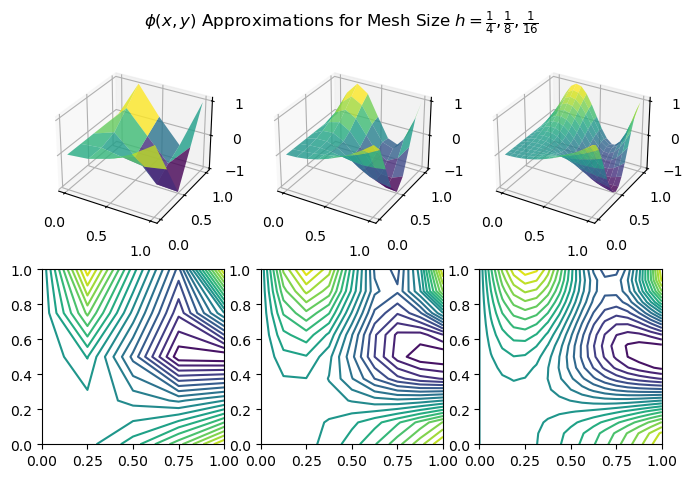

In [120]:
fig = plt.figure(figsize=(8,5))
fig.suptitle(r"$\phi(x,y)$ Approximations for Mesh Size $h=\frac{1}{4},\frac{1}{8},\frac{1}{16}$")
jacobiTableError = np.zeros((nh, 4))
print(8*" " + "h" + 7*" " + "error" + 7*" " + "ratio" + 7*" " + "order")

tab = 0


for h in h_list:
    
    nx = int((xb - xa) / h) - 1
    ny = int((yb - ya) / h) - 1

    # Allocate memory
    x = np.linspace(xa, xb, nx + 2)
    y = np.linspace(ya, yb, ny + 2)
    w_before = np.zeros((nx+2, ny+2))
    w_after = np.zeros((nx+2, ny+2))
    w_exact = np.zeros((nx+2, ny+2))
    residuals = np.zeros((nx+2, ny+2))


    # boundary conditions
    for i in range(nx+2):
        w_before[i,0] = phi(x[i], y[0])
        w_before[i,ny+1] = phi(x[i], y[ny+1])
    
    for j in range(ny+2):
        w_before[0,j] = phi(x[0], y[j])
        w_before[nx+1,j] = phi(x[nx+1], y[j])
    
    w_after = w_before.copy() 

    
    for i in range(nx+2):
        for j in range(ny+2):
            w_exact[i,j] = phi(x[i], y[j])
    
    # ratio and iteration count
    ratio = 1.0
    k = 0

    
    while ratio > tolerance:
        k += 1

       
        for i in range(1, nx+1): 
            for j in range(1, ny+1):
                residuals[i,j] = rho(x[i], y[j]) + (4 * w_before[i,j] - w_before[i+1,j] \
                - w_before[i-1,j] - w_before[i,j+1] - w_before[i,j-1]) / (h**2)
        
        
        residual_norm = np.max(np.abs(residuals))

      
        if k == 1:
            r0 = residual_norm
        ratio = residual_norm / r0

       
        for i in range(1, nx+1): 
            for j in range(1, ny+1):
                w_after[i,j] = (w_before[i+1,j] + w_before[i-1,j] \
                + w_before[i,j+1] + w_before[i,j-1] - ((h**2) * rho(x[i], y[j]))) / 4

     
        w_before = w_after.copy()

    
    jacobiTableError[tab,0] = k 
    jacobiTableError[tab,1] = np.max(np.abs(w_exact - w_before))

    if tab >= 1:
        jacobiTableError[tab,2] = jacobiTableError[tab-1,1] / jacobiTableError[tab,1]
        jacobiTableError[tab,3] = log(jacobiTableError[tab,2], 2)
    
    print(f"{h:9.6f}{jacobiTableError[tab,1]:12.8f}{jacobiTableError[tab,2]:12.8f}{jacobiTableError[tab,3]:12.8f}")

    
    if tab in [1, 2, 3]:
        xx, yy = np.meshgrid(x,y)
        ax = fig.add_subplot(int('23' + str(tab)), projection = '3d')
        ax.plot_surface(xx, yy, w_before, cmap = 'viridis', alpha = 0.8)
        ax = fig.add_subplot(int('23' + str(tab+3)))
        ax.contour(xx, yy, w_before, 20)
    tab += 1

# Shrodinger's Equation

In [96]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [97]:
def Vpot(x):
    return x**2

In [98]:
a = -8
b = 8
N = 1001

In [99]:
x = np.linspace(a,b,N)
h = x[1]-x[0]

T = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            T[i,j]= -2
        elif np.abs(i-j)==1:
            T[i,j]=1
        else:
            T[i,j]=0

In [100]:
V = np.zeros((N-2)**2).reshape(N-2,N-2)
for i in range(N-2):
    for j in range(N-2):
        if i==j:
            V[i,j]= Vpot(x[i+1])
        else:
            V[i,j]=0

In [101]:
H = -T/(2*h**2) + V

val,vec=np.linalg.eig(H)
z = np.argsort(val)
z = z[0:4]
energies=(val[z]/val[z][0])
print(energies)

[1.         2.99995474 4.99981896 6.99959265]


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_3440/1008188010.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel('$\psi$(x)',size=14)


Text(0.5, 1.0, 'normalized wavefunctions for a harmonic oscillator using finite difference method')

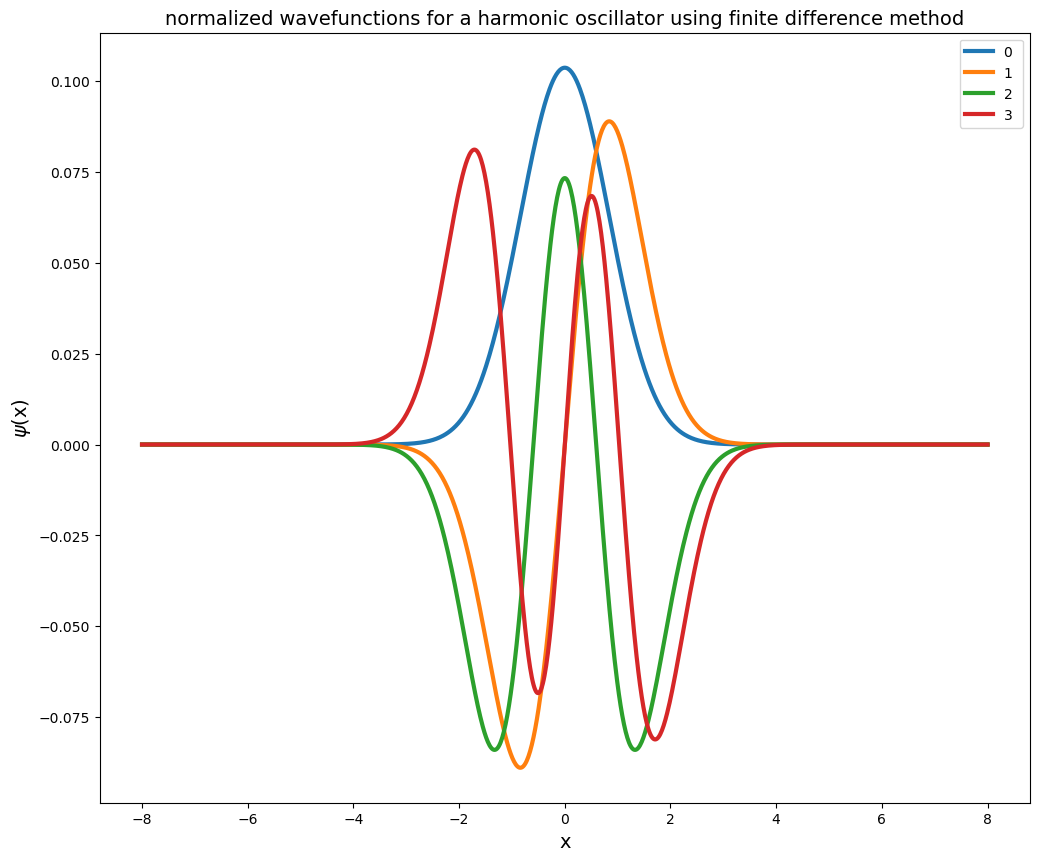

In [102]:
plt.figure(figsize=(12,10))
for i in range(len(z)):
    y = []
    y = np.append(y,vec[:,z[i]])
    y = np.append(y,0)
    y = np.insert(y,0,0)
    plt.plot(x,y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator using finite difference method',size=14)
